In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_dir = 'data'
filename = 'coldplay_lyrics.txt'

coldplay_songs = open(os.path.join(os.pardir, data_dir, filename), 'r')

In [3]:
lyrics = coldplay_songs.read()

In [4]:
type(lyrics)

str

In [5]:
len(lyrics)

154628

In [6]:
def tokenize_lyrics(lyrics):
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r"[a-z]|\s|'")
    return tokenizer.tokenize(lyrics.lower())

ascii_values = [ord(' '), ord("'")] + list(range(ord('a'), ord('z') + 1))
chars = list(map(chr, ascii_values))
indices = list(range(len(ascii_values)))
char_to_index = dict(zip(chars, indices))
index_to_char = dict(zip(indices, chars))

def generate_sentences(tokenized_lyrics, max_len=20, step=1):
    sentences = []
    next_char = []
    for i in range(0, len(tokenized_lyrics) - max_len, step):
        sentences.append(tokenized_lyrics[i:i + max_len])
        next_char.append(tokenized_lyrics[i + max_len])
        
    return sentences, next_char

def vectorize_sentences(sentences, next_char, max_len=20):
    x = np.zeros((len(sentences), max_len, len(chars)), dtype=np.int32)
    y = np.zeros((len(sentences), len(chars)), dtype=np.int32)

    for i, sentence in enumerate(sentences):
        for t, char in enumerate(sentence):
            x[i, t, char_to_index[char]] = 1
        y[i, char_to_index[next_char[i]]] = 1
        
    return x,y

def process_lyrics(lyrics):
    tokenized_lyrics = tokenize_lyrics(lyrics)
    sentences, next_char = generate_sentences(tokenized_lyrics)
    x, y = vectorize_sentences(sentences, next_char)
    return x,y

In [7]:
x, y = process_lyrics(lyrics)

In [8]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

import sys
from numpy import random

def on_epoch_end(epoch, logs, max_len=20):
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(lyrics) - max_len - 1)
    for diversity in [0.2, 0.5]:
        print('----- Diversity:', diversity)

        generated = ''
        sentence = lyrics[start_index: start_index + max_len]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, max_len, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_to_index[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = index_to_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.optimizers import Adam, RMSprop
from keras.callbacks import LambdaCallback

Using TensorFlow backend.


In [10]:
max_len = 20

model = Sequential([
    LSTM(units=256, input_shape=(max_len, len(chars))),
    Dense(len(chars)),
    Activation('softmax')
])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_1 (Dense)              (None, 28)                7196      
_________________________________________________________________
activation_1 (Activation)    (None, 28)                0         
Total params: 299,036
Trainable params: 299,036
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])

In [13]:
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [14]:
history = []

In [15]:
history.append(
    model.fit(
        x,
        y,
        batch_size=128,
        epochs=10,
        callbacks=[print_callback]
    )
)

Epoch 1/10
154608/154608 [==============================] - 114s 739us/step - loss: 2.3065 - acc: 0.3417
----- Generating text after Epoch: 0
----- Diversity: 0.2
----- Generating with seed: "in love and i missed"
in love and i missed i want to cal you we'll got the sin the stite you we'll got the with you before you we're gonna get it get it together the when i want to we'll the the with you do and i want to the say i want to whe waiting the the sin i want to see you we'll gonna get it get it get it toge it and i was a the the with the with you i want to the will i want to see you we'll got the sin you we'll bee the with you 
----- Diversity: 0.5
----- Generating with seed: "in love and i missed"
in love and i missed you my and see it back i have you the brow i want you we'll get the till i stear you we'll be i wanta the stan in i need it on you the white i want to the with the waiting to can the but you befind you'll feeling of the with the in you heart bee you want the brime i love 

/home/raghuvansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


r it all always came for you and i'm sure to me for you could love you are i'll speay and i'm soreding and i don't let it feels like i try to pull you come home and i would it me to me and i stould have in on my day and i know well the start i want to pull through be break your back and the end a could wen anybody know when you don't it's toucher came from my head on a bigger ju
Epoch 4/10
154608/154608 [==============================] - 118s 760us/step - loss: 1.1467 - acc: 0.6484
----- Generating text after Epoch: 3
----- Diversity: 0.2
----- Generating with seed: "nd for feel incompre"
nd for feel incompread the world we don't know we're gonna get it get it together and sinking light the start a perfes when i really here and in my heart and in the start a perfel so he word and sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep sleep

in on me is it because it always ur when i want to go to see what it stop out of the start sweet again i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't no i don't n


In [28]:
history[0].history.keys()

dict_keys(['loss', 'acc'])

In [32]:
import matplotlib.pyplot as plt

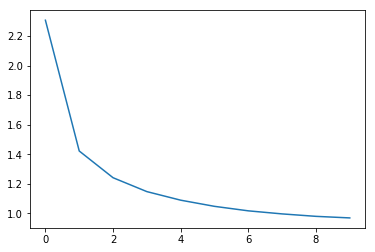

In [33]:
plt.plot(history[0].history['loss'])

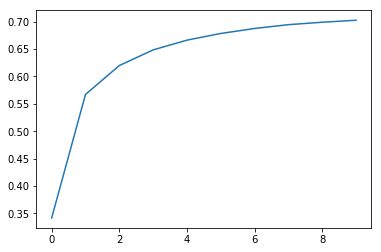

In [34]:
plt.plot(history[0].history['acc'])

In [25]:
def generate_output():
    generated = ''
    usr_input = input("Write the beginning of your poem, the Coldplay machine will complete it. Your input is: ")

    sentence = ('{0:0>' + str(Tx) + '}').format(usr_input).lower()
    generated += usr_input 

    sys.stdout.write("\n\nHere is your song: \n\n") 
    sys.stdout.write(usr_input)
    for i in range(400):

        x_pred = np.zeros((1, Tx, len(chars)))

        for t, char in enumerate(sentence):
            if char != '0':
                x_pred[0, t, char_to_index[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature = 0.2)
        next_char = index_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()

        if next_char == '\n':
            continue

In [24]:
Tx = 20
generate_output()

Write the beginning of your poem, the Coldplay machine will complete it. Your input is: look how they shine


Here is your poem: 

look how they shine hello won't you let me in sight to see when you want to go stop

/home/raghuvansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


 is the sun said i hear you this i want to go so it for you you want to be a soul it feels for you i'm sorry i want to go to see what it feels like they're gonna go go to see what it feels they say is for the start sweep the sun and i want to go on the stars i want to go sometimes you and i will i couldn't see the sun and i want to go

In [ ]:
save_dir = 'saved_model'

if not os.path.exists(os.path.join(save_dir):
    os.mkdir(os.path)